In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Газодинамические параметры EGT, N1A, N2A, NF, FF, MN, T2 
# 2.  Параметры внешней среды  TAT, OAT, ALT, P2e
# 3. Флаги режима работы двигателя WAI, NAI, PRV, HPV, XF ( из них некоторые всегда по нулям)

In [3]:
X_train = pd.read_csv('X_train.csv', parse_dates=['reportts'])
X_train.head()

,reportts,acnum,pos,fltdes,dep,arr,ivs12,ibe,iaie,iai,...,vorv,votm,vsva,w14,pf,wai,nai,prv,hpv,xf
0,2018-12-24 10:53:22,VQ-BGU,1,8990.0,EDHI,UUDD,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1160.0,0.53,0.0,0.0,1.0,0.0,0.0
1,2018-12-24 10:53:22,VQ-BGU,2,8990.0,EDHI,UUDD,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1160.0,0.53,0.0,0.0,1.0,0.0,0.0
2,2018-12-25 15:23:23,VQ-BGU,1,1024.0,URSS,UUDD,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1179.0,0.53,0.0,0.0,1.0,0.0,0.0
3,2018-12-25 15:23:23,VQ-BGU,2,1024.0,URSS,UUDD,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1179.0,0.53,0.0,0.0,1.0,0.0,0.0
4,2018-12-25 20:49:27,VQ-BGU,1,217.0,UUDD,UNBB,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1302.0,0.51,0.0,0.0,1.0,0.0,0.0


In [4]:
y_train = pd.read_csv('y_train.csv', parse_dates=['reportts'])


In [5]:
df = X_train.merge(y_train, on=['acnum', 'pos', 'reportts'])

In [19]:
df.describe()

,pos,fltdes,ivs12,ibe,iaie,iai,zwbp,acct,alt,alt_peak,...,votm,vsva,w14,pf,wai,nai,prv,hpv,xf,egtm
count,2833.000000,2833.000000,0.0,0.0,0.0,0.0,0.0,2833.0,2833.000000,2833.000000,...,0.0,2833.000000,2833.000000,2833.000000,2833.0,2833.000000,2833.000000,2833.0,2833.000000,2827.000000
mean,1.596188,1220.887399,NaN,NaN,NaN,NaN,NaN,-20.0,2179.808330,1839.009884,...,NaN,0.443115,1205.096011,0.344271,0.0,0.106601,0.648076,0.0,0.006707,28.324780
std,0.490747,1176.297917,NaN,NaN,NaN,NaN,NaN,0.0,803.838188,828.017663,...,NaN,0.394734,53.462154,0.229710,0.0,0.308659,0.477655,0.0,0.081634,6.767431
min,1.000000,15.000000,NaN,NaN,NaN,NaN,NaN,-20.0,478.000000,-56.000000,...,NaN,0.000000,1020.000000,0.010000,0.0,0.000000,0.000000,0.0,0.000000,15.161000
25%,1.000000,777.000000,NaN,NaN,NaN,NaN,NaN,-20.0,1629.000000,1303.000000,...,NaN,0.000000,1171.000000,0.030000,0.0,0.000000,0.000000,0.0,0.000000,23.286000
50%,2.000000,923.000000,NaN,NaN,NaN,NaN,NaN,-20.0,2020.000000,1711.000000,...,NaN,0.768000,1206.000000,0.510000,0.0,0.000000,1.000000,0.0,0.000000,27.321000
75%,2.000000,1023.000000,NaN,NaN,NaN,NaN,NaN,-20.0,2543.000000,2228.000000,...,NaN,0.792000,1242.000000,0.510000,0.0,0.000000,1.000000,0.0,0.000000,33.422500
max,2.000000,8991.000000,NaN,NaN,NaN,NaN,NaN,-20.0,5913.000000,5472.000000,...,NaN,0.847000,1362.000000,0.530000,0.0,1.000000,1.000000,0.0,1.000000,47.850000


In [6]:
# Газодинамические параметры EGT, N1A, N2A, NF, FF, MN, T2 
# 2.  Параметры внешней среды  TAT, OAT, ALT, P2e
# 3. Флаги режима работы двигателя WAI, NAI, PRV, HPV, XF ( из них некоторые всегда по нулям)
cols = ['egt', 'n1a', 'n2a', 'nf', 'ff', 'mn', 't2', 'tat', 'oat', 'alt', 'p2e','wai', 'nai', 'prv', 'hpv', 'xf'\
       , 'acnum', 'egtm']

In [7]:
df = df[cols]

In [7]:
df.shape

(2833, 18)

In [7]:
df.isnull().sum()

egt       0
n1a       0
n2a       0
nf        0
ff        0
mn        0
t2        0
tat       0
oat      23
alt       0
p2e       0
wai       0
nai       0
prv       0
hpv       0
xf        0
acnum     0
egtm      6
dtype: int64

In [25]:
df.info

<bound method DataFrame.info of         egt    n1a    n2a     nf      ff     mn    t2   tat   oat     alt  \
0     800.1  77.95  87.63  77.92  2783.0  0.257   3.0   2.0   1.6  1418.0   
1     802.4  78.00  87.79  78.00  2775.0  0.257   3.1   2.0   1.6  1418.0   
2     851.4  82.70  90.22  82.71  3185.0  0.254  10.4  10.2   9.0  2005.0   
3     854.0  82.66  90.35  82.71  3179.0  0.254  10.6  10.2   9.0  2005.0   
4     851.6  86.02  89.57  86.10  3637.0  0.262  -8.9  -7.2  -9.9  1739.0   
...     ...    ...    ...    ...     ...    ...   ...   ...   ...     ...   
2828  881.6  81.85  90.53  81.82  3062.0  0.244  17.6  20.0  16.6  2248.0   
2829  905.7  83.68  91.36  83.63  3281.0  0.267  19.5  23.7  16.4  1629.0   
2830  910.1  83.66  91.37  83.69  3289.0  0.267  19.3  23.7  16.4  1629.0   
2831  914.2  84.67  91.60  84.67  3374.0  0.252  16.3  16.0  14.7  1744.0   
2832  911.6  84.66  91.57  84.60  3402.0  0.252  16.4  16.0  14.7  1744.0   

         p2e  wai  nai  prv  hpv   xf   acn

In [8]:
cols_nan = df.columns[df.isna().any()].tolist()

In [9]:
cols_nan

['oat', 'egtm']

In [10]:
df.corr()['egtm'].sort_values()

egt    -0.400946
oat    -0.345743
t2     -0.343562
tat    -0.342227
n2a    -0.312709
n1a    -0.215345
nf     -0.210342
p2e    -0.206649
ff     -0.189005
xf      0.017237
mn      0.021930
alt     0.099195
nai     0.149398
prv     0.324011
egtm    1.000000
wai          NaN
hpv          NaN
Name: egtm, dtype: float64

In [11]:
df['wai'].value_counts()

0.0    2833
Name: wai, dtype: int64

In [12]:
df['hpv'].value_counts()

0.0    2833
Name: hpv, dtype: int64

In [9]:
cor_nan_cols = df.corr().index[df.corr()['egtm'].isna()].tolist()

In [10]:
df = df.drop(columns=cor_nan_cols, axis=1)

In [16]:
df.shape

(2833, 16)

In [11]:
def percent_missing(df):
    percent_nan = (df.isnull().sum() / len(df)) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [20]:
percent_nan = percent_missing(df)
percent_nan.index[0]

'egtm'

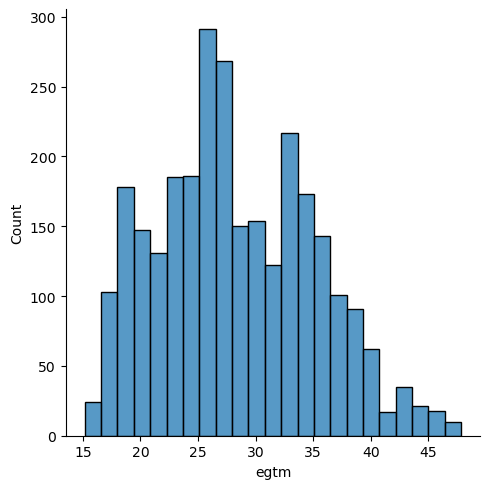

In [33]:
sns.displot(data=df, x='egtm');

<AxesSubplot:xlabel='n2a', ylabel='egtm'>

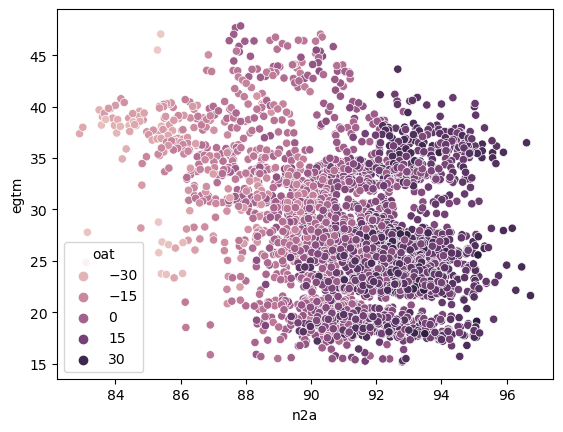

In [36]:
sns.scatterplot(data=df, x='n2a', y='egtm' ,hue='oat')

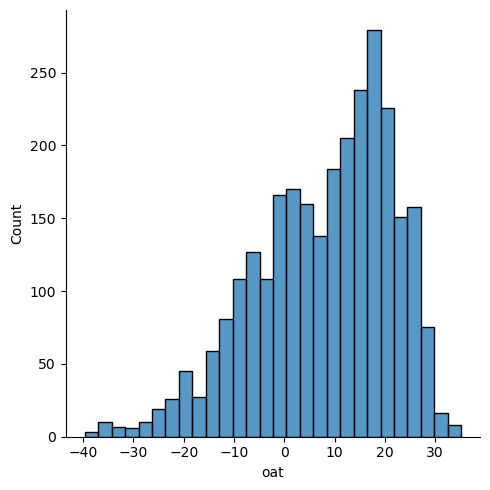

In [38]:
sns.displot(data=df, x='oat');

In [39]:
min(df['oat'])

-39.7

In [15]:
df['oat'].fillna(value=df['oat'].median(), inplace=True)

In [43]:
min(df['oat'])

-39.7

In [44]:
max(df['oat'])

35.2

In [16]:
df['egtm'].fillna(value=df['egtm'].median(), inplace=True)

In [17]:
percentage_nan = percent_missing(df)

In [47]:
percentage_nan

Series([], dtype: float64)

In [18]:
cat_cols = df.select_dtypes(include=object)

In [19]:
num_cols = df.select_dtypes(exclude=object)

In [51]:
cat_cols

,acnum
0,VQ-BGU
1,VQ-BGU
2,VQ-BGU
3,VQ-BGU
4,VQ-BGU
...,...
2828,VQ-BDU
2829,VQ-BDU
2830,VQ-BDU
2831,VQ-BDU


In [52]:
num_cols

,egt,n1a,n2a,nf,ff,mn,t2,tat,oat,alt,p2e,nai,prv,xf,egtm
0,800.1,77.95,87.63,77.92,2783.0,0.257,3.0,2.0,1.6,1418.0,14.902,0.0,1.0,0.0,44.437
1,802.4,78.00,87.79,78.00,2775.0,0.257,3.1,2.0,1.6,1418.0,14.755,0.0,1.0,0.0,45.869
2,851.4,82.70,90.22,82.71,3185.0,0.254,10.4,10.2,9.0,2005.0,14.669,0.0,1.0,0.0,44.379
3,854.0,82.66,90.35,82.71,3179.0,0.254,10.6,10.2,9.0,2005.0,14.471,0.0,1.0,0.0,44.904
4,851.6,86.02,89.57,86.10,3637.0,0.262,-8.9,-7.2,-9.9,1739.0,14.699,0.0,1.0,0.0,43.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,881.6,81.85,90.53,81.82,3062.0,0.244,17.6,20.0,16.6,2248.0,14.523,0.0,0.0,0.0,22.985
2829,905.7,83.68,91.36,83.63,3281.0,0.267,19.5,23.7,16.4,1629.0,14.946,0.0,1.0,0.0,23.090
2830,910.1,83.66,91.37,83.69,3289.0,0.267,19.3,23.7,16.4,1629.0,14.807,0.0,1.0,0.0,19.310
2831,914.2,84.67,91.60,84.67,3374.0,0.252,16.3,16.0,14.7,1744.0,14.737,0.0,1.0,0.0,19.645


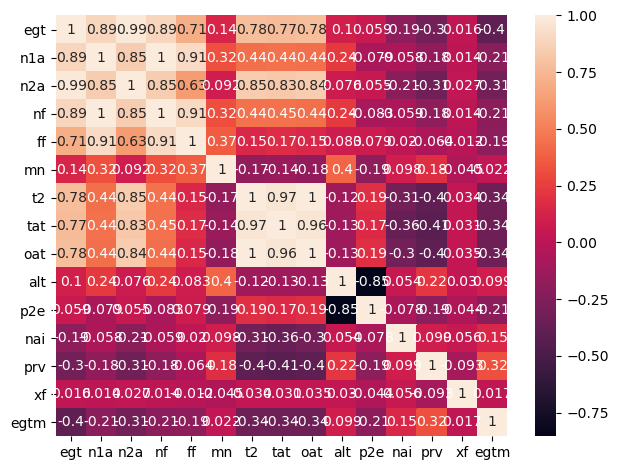

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

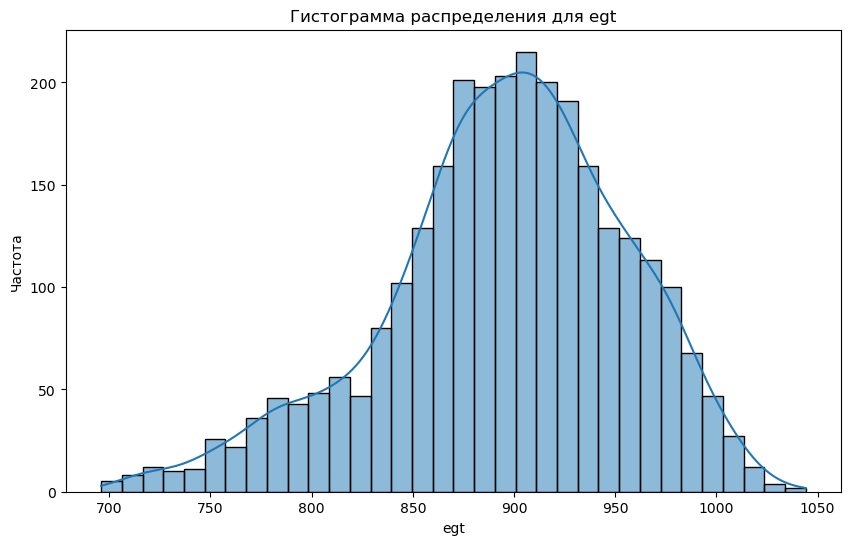

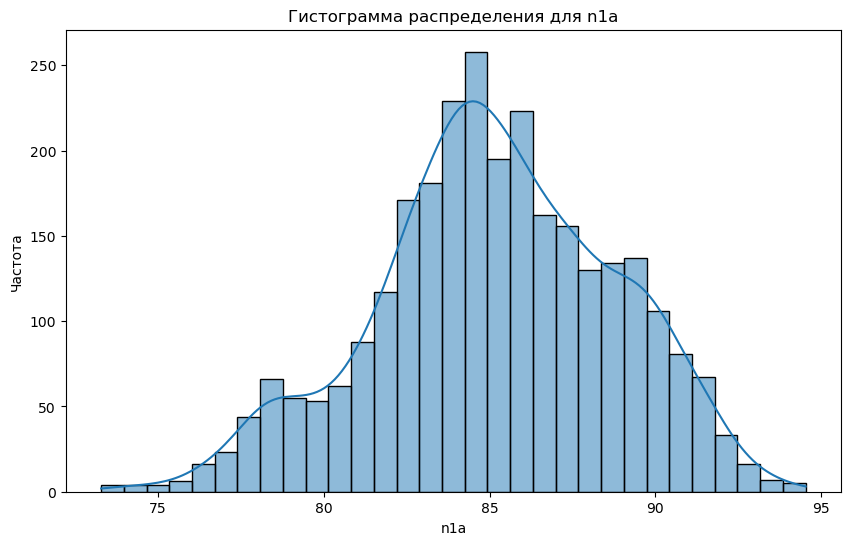

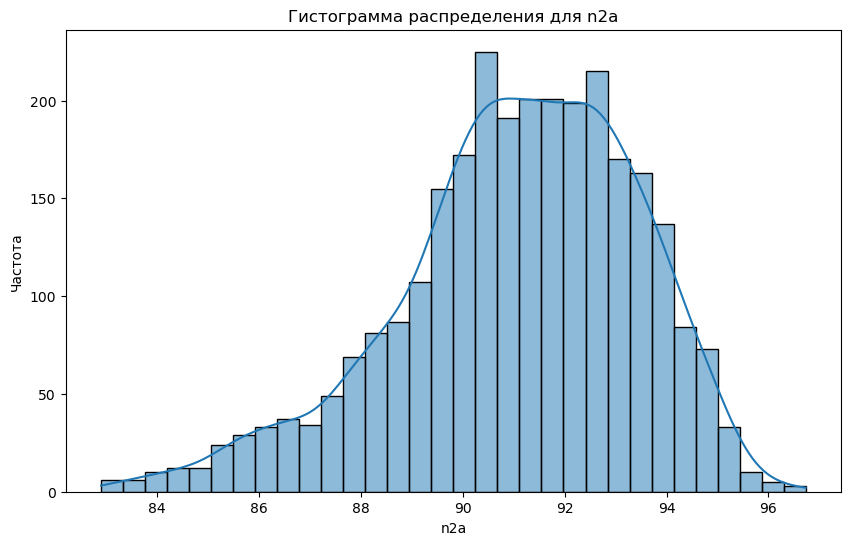

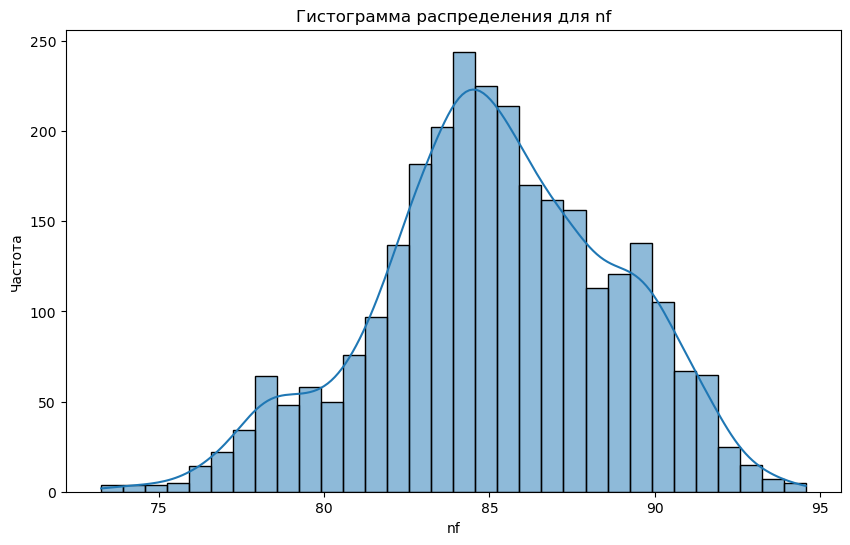

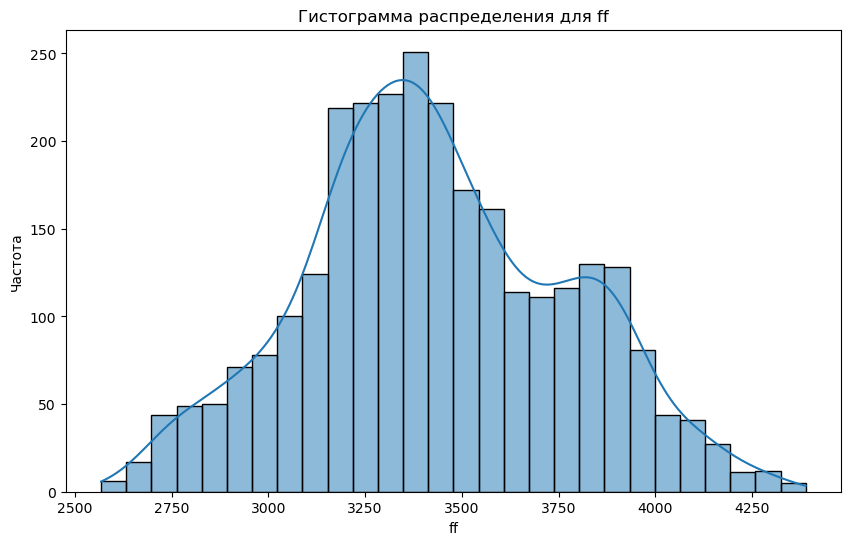

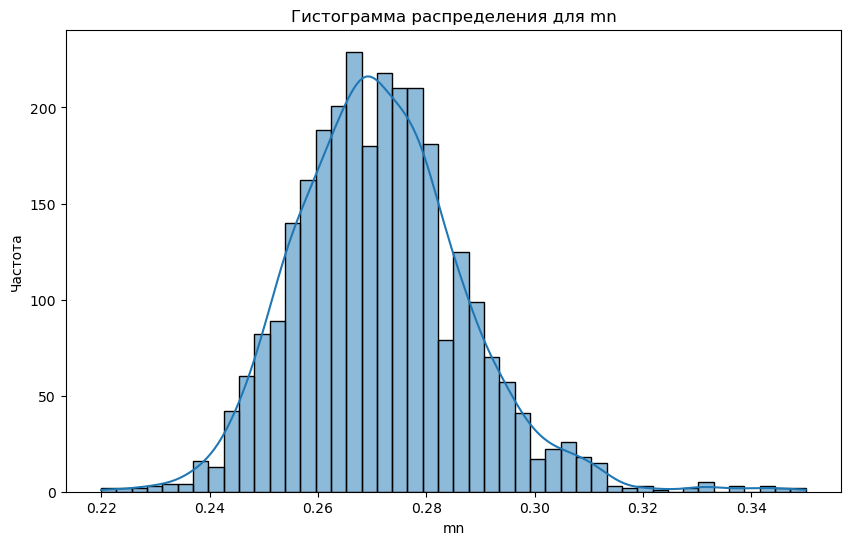

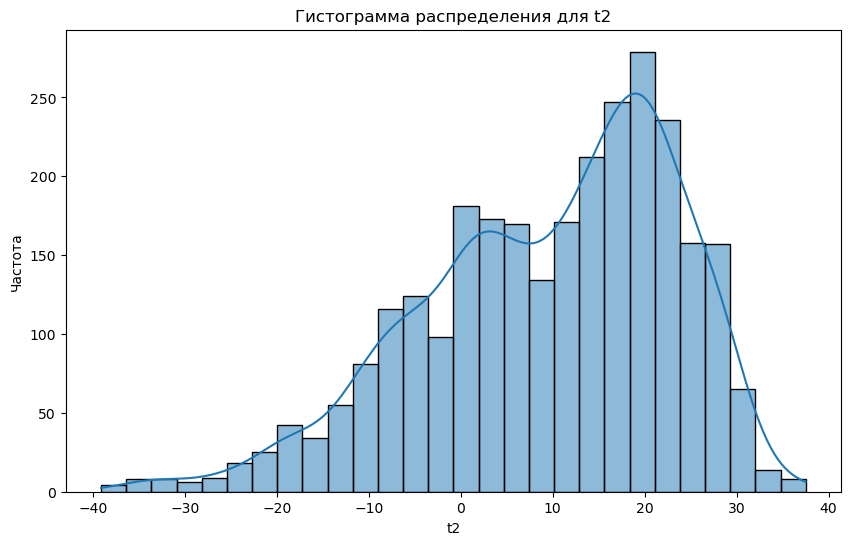

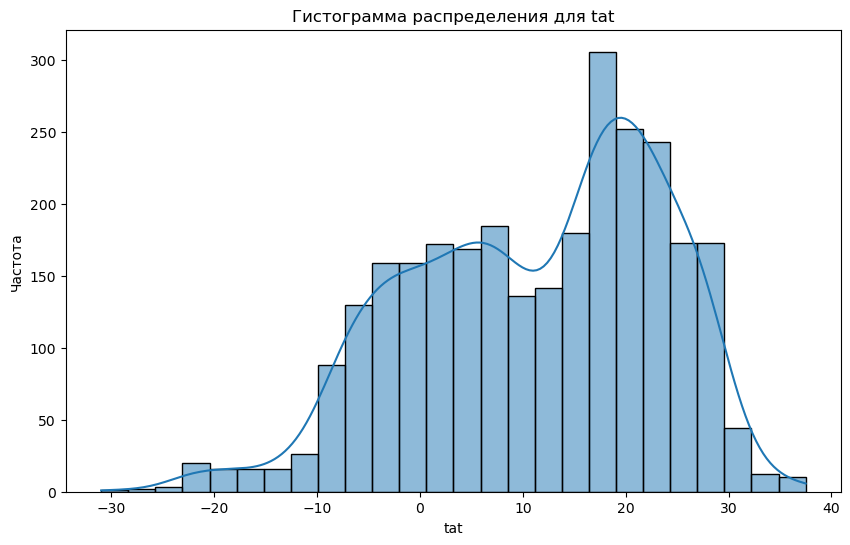

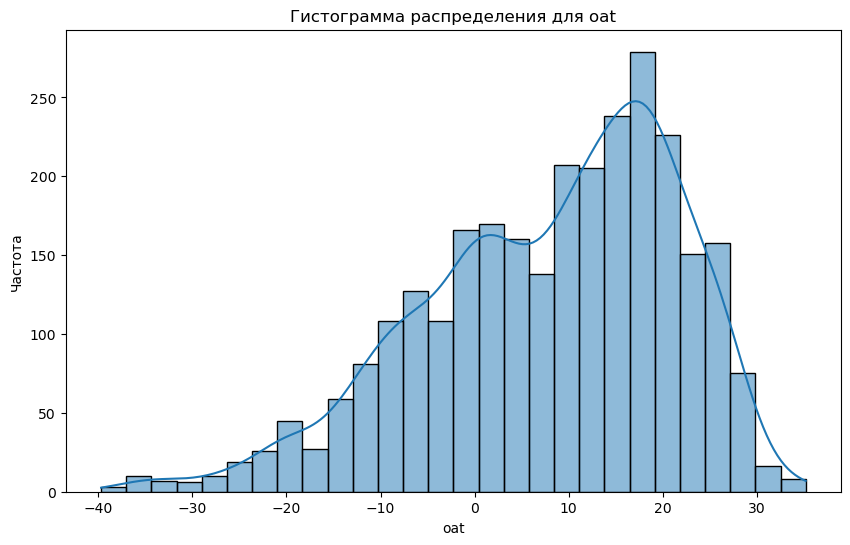

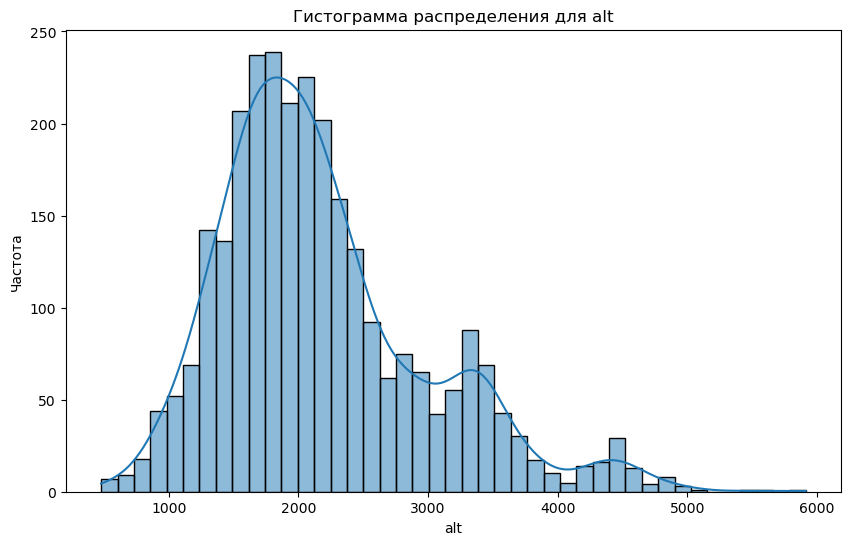

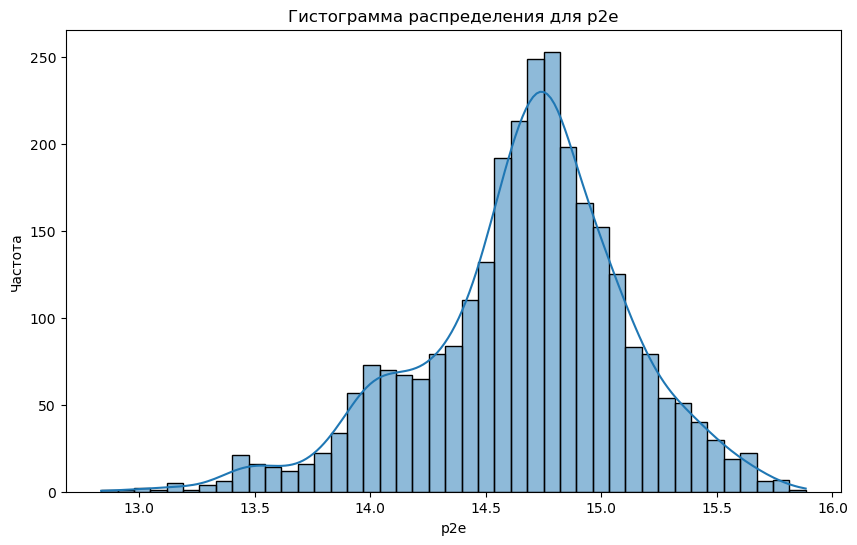

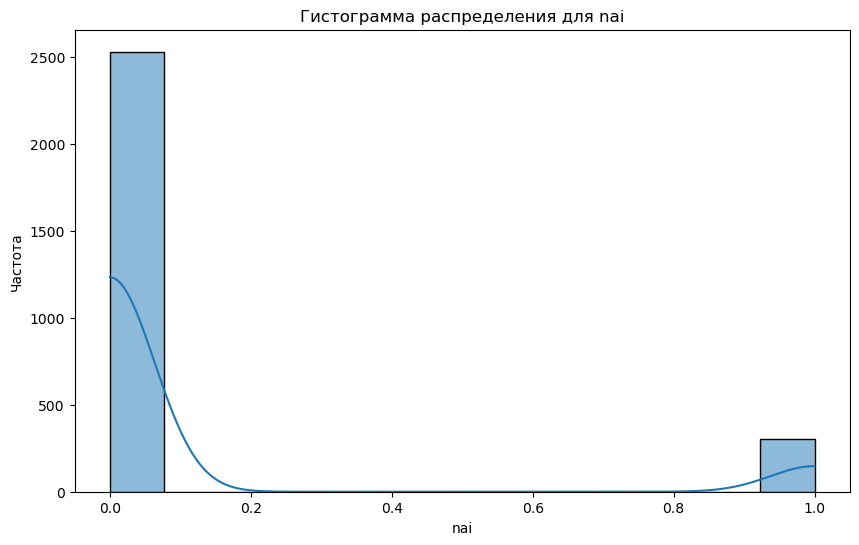

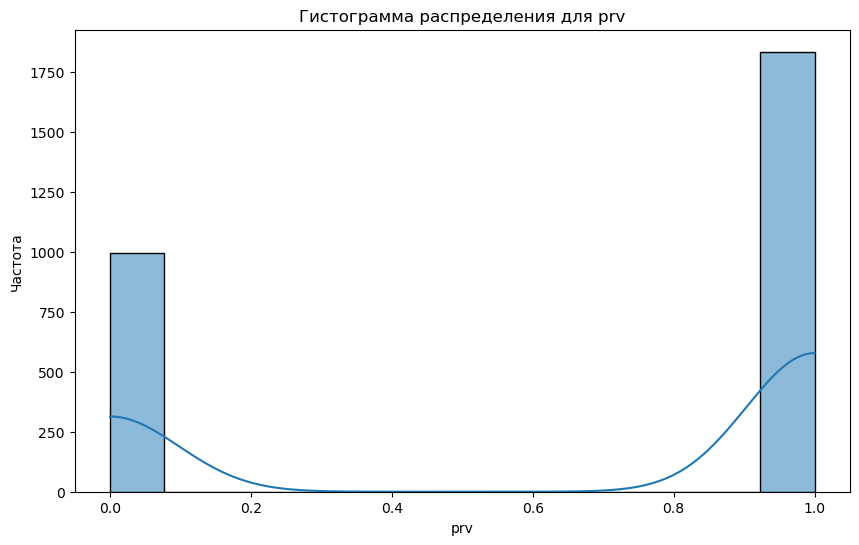

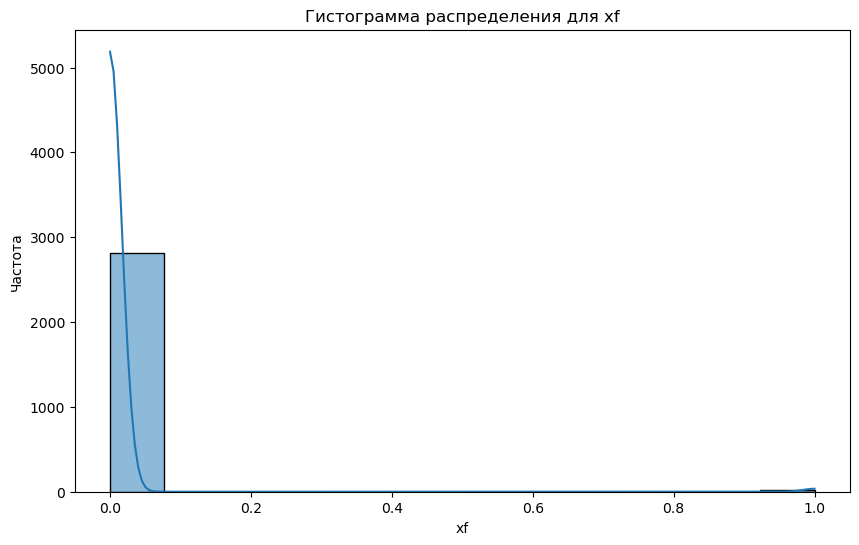

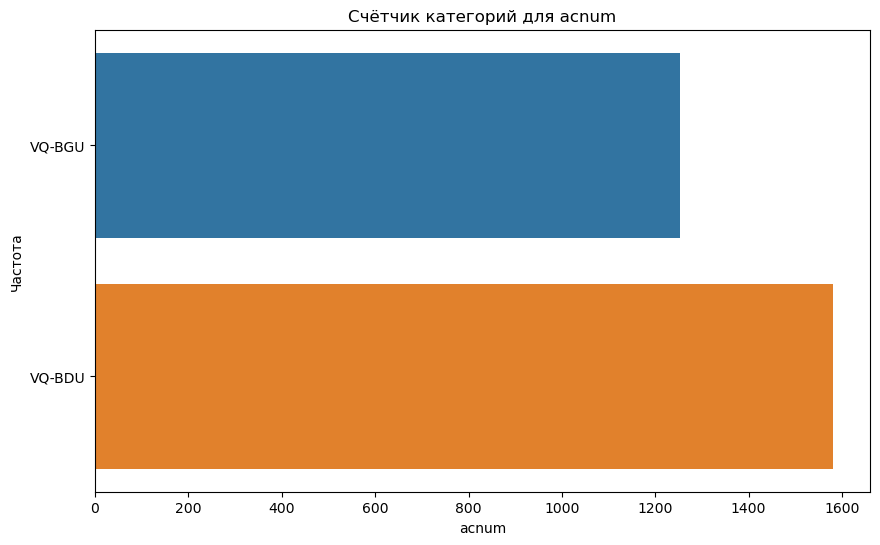

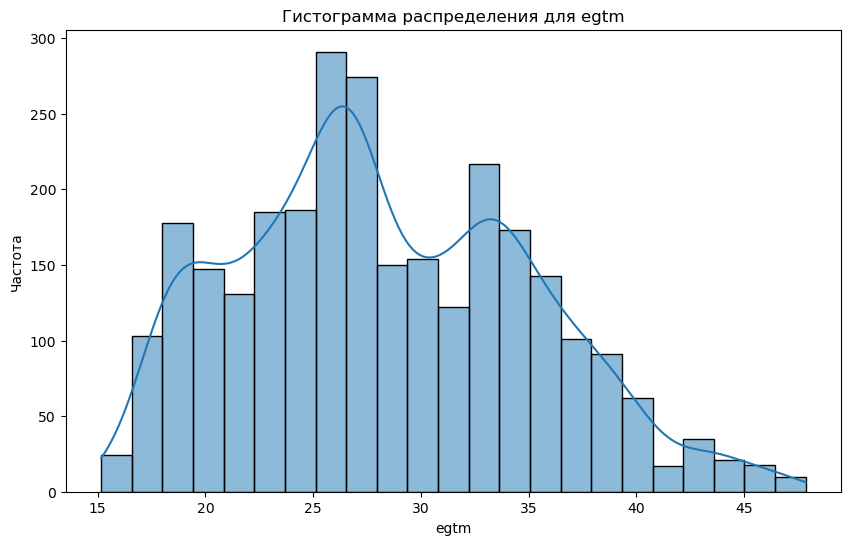

In [26]:
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Установка размера фигуры

    # Проверка типа данных в колонке
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True)
        plt.title(f'Гистограмма распределения для {column}')
    elif df[column].dtype == 'object':
        sns.countplot(y=column, data=df)
        plt.title(f'Счётчик категорий для {column}')
        
    plt.ylabel('Частота')
    plt.xlabel(column)
    plt.show()

In [27]:
# в итоге удалил nan-ы проверил каждую колонку (нету выбросов везде распределение норм ) начинаем построение модели
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split



In [35]:
X = df.drop('egtm',axis=1)
X = X.drop('acnum',axis=1)

In [36]:
y = df['egtm']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

In [38]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [39]:
base_elastic_net_model = ElasticNet()

In [40]:
grid_model = GridSearchCV(estimator=base_elastic_net_model, param_grid=param_grid,\
                          scoring='neg_mean_squared_error', cv=5)

In [41]:
grid_model.fit(X_train, y_train)

/home/fltww/anaconda3/envs/My_First_ML_Course/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.641e+01, tolerance: 7.444e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/fltww/anaconda3/envs/My_First_ML_Course/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.918e+01, tolerance: 7.532e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/fltww/anaconda3/envs/My_First_ML_Course/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might wan

/home/fltww/anaconda3/envs/My_First_ML_Course/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+02, tolerance: 7.184e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/fltww/anaconda3/envs/My_First_ML_Course/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+03, tolerance: 7.444e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/fltww/anaconda3/envs/My_First_ML_Course/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might wan

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [42]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [43]:
predict = grid_model.predict(X_test)

In [44]:
mae = mean_absolute_error(y_test, predict)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, predict))

In [47]:
r2 = r2_score(y_test, predict)

In [48]:
r2

0.6674416818660751

In [49]:
mae

2.951650720190983

In [50]:
rmse

3.7962006508332746